<a href="https://colab.research.google.com/github/ronalhung05/DS/blob/main/fraud_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn import metrics, preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier

# DATA ANALYZE

In [ ]:
# link to doc
sheet_url = 'https://docs.google.com/spreadsheets/d/1zoutEajqr2sQAZcf8JhQjLnWkHUpBWUrOOZI8uvKYBg/edit'

# Convert to export format for CSV download
csv_url = sheet_url.replace('/edit', '/export?format=csv')

# Load the data into a DataFrame
df = pd.read_csv(csv_url)

In [ ]:
df.shape

(59054, 19)

In [ ]:
df.head()

,card4,card6,P_emaildomain,TransactionAmt,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,isFraud
0,visa,debit,gmail.com,62.95,139,110,0,0,135,93,0,0,93,0,93,0,637,114,0
1,visa,debit,NaN,35.95,1,1,0,0,1,0,0,0,1,0,1,0,3,1,0
2,visa,debit,yahoo.com,117.00,1,1,0,0,0,2,0,0,1,0,1,0,4,1,1
3,visa,debit,hotmail.com,54.50,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0
4,visa,debit,gmail.com,255.00,1,3,0,0,0,4,0,0,2,0,3,1,20,1,0


In [ ]:
df.describe()

,TransactionAmt,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,isFraud
count,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.00000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000
mean,134.651623,13.674671,14.868070,0.006723,3.888085,5.49492,8.788262,2.773326,4.966624,4.405578,5.061097,9.924713,3.982541,32.028516,8.062333,0.035882
std,294.384212,132.158505,153.096419,0.207162,67.629610,25.72493,70.265787,61.327050,94.384821,16.524347,94.468402,93.082192,86.122696,128.340401,48.642438,0.185999
min,0.292000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.950000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,68.950000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000
75%,119.950000,3.000000,3.000000,0.000000,0.000000,1.00000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,2.000000,0.000000
max,31937.391000,4682.000000,5690.000000,26.000000,2250.000000,333.00000,2250.000000,2252.000000,3328.000000,210.000000,3254.000000,3185.000000,3185.000000,2914.000000,1425.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59054 entries, 0 to 59053
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   card4           58893 non-null  object 
 1   card6           58892 non-null  object 
 2   P_emaildomain   49598 non-null  object 
 3   TransactionAmt  59054 non-null  float64
 4   C1              59054 non-null  int64  
 5   C2              59054 non-null  int64  
 6   C3              59054 non-null  int64  
 7   C4              59054 non-null  int64  
 8   C5              59054 non-null  int64  
 9   C6              59054 non-null  int64  
 10  C7              59054 non-null  int64  
 11  C8              59054 non-null  int64  
 12  C9              59054 non-null  int64  
 13  C10             59054 non-null  int64  
 14  C11             59054 non-null  int64  
 15  C12             59054 non-null  int64  
 16  C13             59054 non-null  int64  
 17  C14             59054 non-null 

In [ ]:
df.nunique()

,0
card4,4
card6,3
P_emaildomain,58
TransactionAmt,5679
C1,458
C2,460
C3,13
C4,256
C5,274
C6,382


# HANDLING DUPLICATED AND MISSING DATA

In [ ]:
# Calculate percentage of missing values for each column
missing_percentage = (df.isna().sum() / len(df)) * 100

# Convert to a DataFrame for better visualization
missing_df = missing_percentage[missing_percentage > 0].sort_values(ascending=False).reset_index()
missing_df.columns = ['Column', 'Missing Percentage']

print(missing_df)

          Column  Missing Percentage
0  P_emaildomain           16.012463
1          card6            0.274325
2          card4            0.272632


In [ ]:
df['card4'].value_counts()

,count
card4,
visa,38518
mastercard,18872
american express,855
discover,648


In [ ]:
df['card6'].value_counts()

,count
card6,
debit,43873
credit,15014
debit or credit,5


In [ ]:
df['P_emaildomain'].value_counts()

,count
P_emaildomain,
gmail.com,22668
yahoo.com,10071
hotmail.com,4544
anonymous.com,3680
aol.com,2894
comcast.net,788
icloud.com,659
outlook.com,513
att.net,426


In [ ]:
# DROP DUPLICATE
print(f"Before: {df.shape}")
duplicates = df[df.duplicated()]
num_duplicates = len(duplicates)
print(f"Number of completely duplicated rows: {num_duplicates}")

df = df.drop_duplicates() #drop duplicated
print(f"After-drop Shape: {df.shape}")

Before: (59054, 19)
Number of completely duplicated rows: 10691
After-drop Shape: (48363, 19)


In [ ]:
df = df.dropna(subset=['card4', 'card6']) #drop missing value

In [ ]:
# df.loc[:, 'card4'] = df['card4'].fillna(df['card4'].mode()[0])
# df.loc[:, 'card6'] = df['card6'].fillna(df['card6'].mode()[0])
# # filling with mode

In [ ]:
# EMAIL GROUPING SIMILARITY
df.loc[df['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'

df.loc[df['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                         'yahoo.es']), 'P_emaildomain'] = 'Yahoo Mail'
df.loc[df['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx',
                                         'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                         'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'
df.loc[df.P_emaildomain.isin(df.P_emaildomain\
                                         .value_counts()[df.P_emaildomain.value_counts() <= 500 ]\
                                         .index), 'P_emaildomain'] = "Others"
# Fill missing values explicitly
df['P_emaildomain'] = df['P_emaildomain'].fillna("NoInf")
# Verify missing values and check consistency
df.isna().sum()

,0
card4,0
card6,0
P_emaildomain,0
TransactionAmt,0
C1,0
C2,0
C3,0
C4,0
C5,0
C6,0


In [ ]:
print(f"After-cleaning Shape: {df.shape}")

After-cleaning Shape: (48202, 19)


In [ ]:
percentages = df['card4'].value_counts(normalize=True) * 100
print(percentages)

card4
visa                64.167462
mastercard          33.621012
discover             1.246836
american express     0.964690
Name: proportion, dtype: float64


# Data Analysis (EDA)

In [ ]:
# Quantile C4
percentiles = df['TransactionAmt'].quantile([0.9, 0.95, 0.99])
print(percentiles)

# Check if transaction ≤ 2000
percent_below_2000 = (df[df['TransactionAmt'] <= 2000].shape[0] / df.shape[0]) * 100
print(f"Percentage of transaction numbers <= 2000: {percent_below_2000:.2f}%")

0.90     300.0000
0.95     459.9995
0.99    1241.5582
Name: TransactionAmt, dtype: float64
Percentage of transaction numbers <= 2000: 99.57%


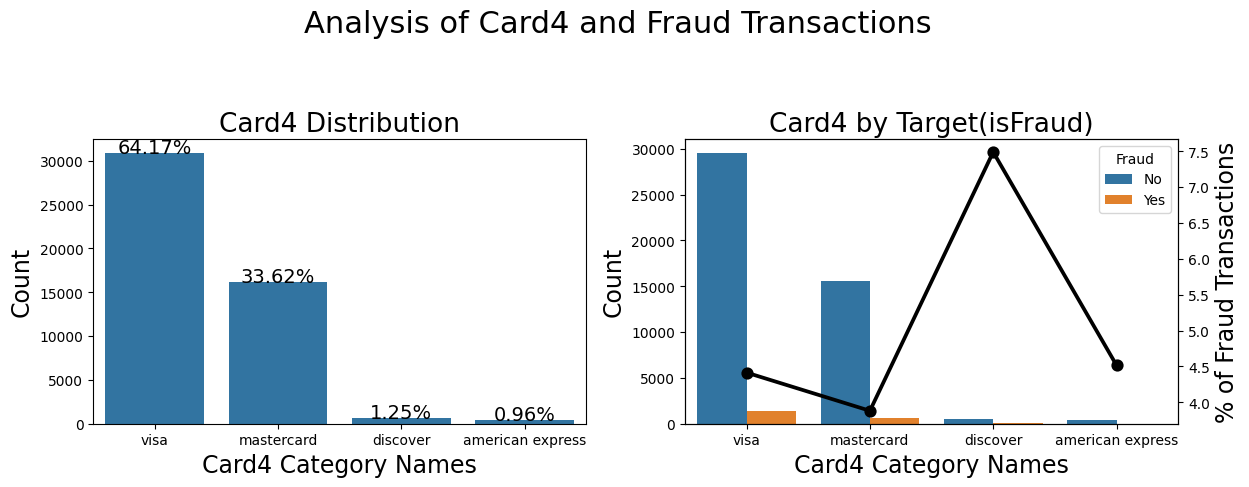

In [ ]:
tmp = pd.crosstab(df['card4'], df['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

# overall chart
plt.figure(figsize=(14,10))
plt.suptitle('Card 4 Distributions')

# first left chart
plt.subplot(221) #location
order_by_value = df['card4'].value_counts().index # order by value (desc)
g = sns.countplot(x='card4', data=df, order= order_by_value)
g.set_title("Card4 Distribution", fontsize=19)
g.set_xlabel("Card4 Category Names", fontsize=17)
g.set_ylabel("Count", fontsize=17)

total = len(df)

for p in g.patches: # add percentages above each of first left
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2f}%'.format(height/total*100),
            ha="center",fontsize=14)

# second right chart
plt.subplot(222)
g1 = sns.countplot(x='card4', hue='isFraud', data=df, order=order_by_value)
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])
gt = g1.twinx() # second y axis -> % fraud transaction
gt = sns.pointplot(x='card4', y='Fraud', data=tmp,
                   color='black', legend=False,
                   order=order_by_value)
gt.set_ylabel("% of Fraud Transactions", fontsize=17)
g1.set_title("Card4 by Target(isFraud)", fontsize=19)
g1.set_xlabel("Card4 Category Names", fontsize=17)
g1.set_ylabel("Count", fontsize=17)

plt.subplots_adjust(hspace = 0.6, top = 0.85)
plt.suptitle('Analysis of Card4 and Fraud Transactions', fontsize=22)
plt.show()

Cả bốn loại thẻ đều có sự khác biệt rõ rệt về số lượng giao dịch. Visa chiếm tỷ lệ lớn nhất (64,17%), tiếp theo là Mastercard (32,62%). Các loại thẻ American Express và Discover có số lượng giao dịch rất thấp, chỉ khoảng 1-1,5%.
Nhận định: Sự phân phối không đồng đều này có thể phản ánh sự phổ biến của các thẻ Visa và Mastercard so với các loại thẻ còn lại.
- Giao dịch gian lận chủ yếu xảy ra trên thẻ Visa, đối với loại thẻ discover có tỷ lệ gian lận cao bất thường mặc dù số lượng giao dịch gian lận ít.
- Điều này cho thấy thẻ Visa có thể dễ bị lạm dụng hơn hoặc có nhiều giao dịch hơn dẫn đến tỷ lệ gian lận cao và cũng nên chú ý đến các giao dịch có thẻ discover

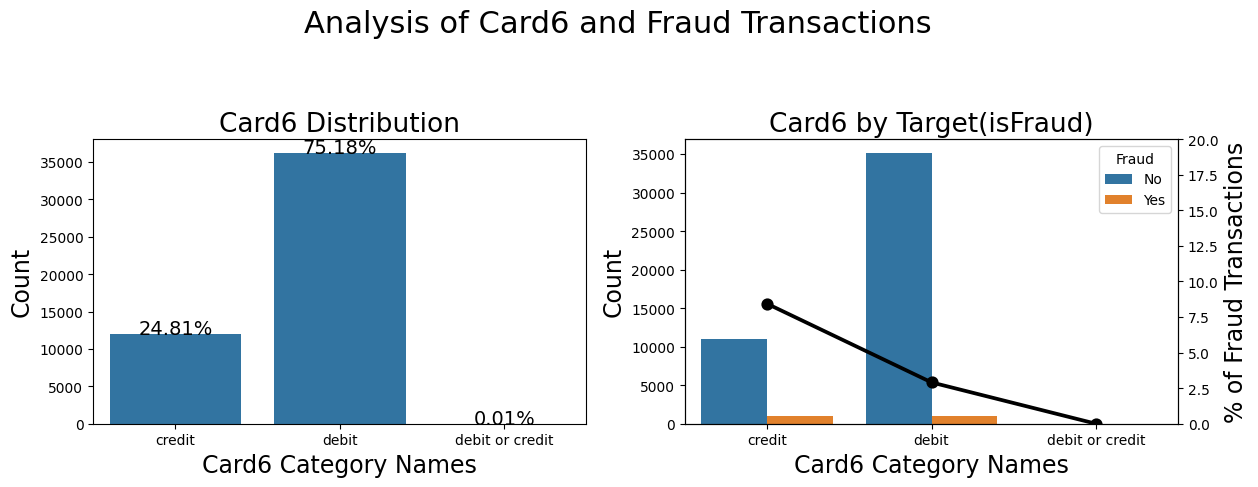

In [ ]:
tmp1 = pd.crosstab(df['card6'], df['isFraud'], normalize='index') * 100
tmp1 = tmp1.reset_index()
tmp1.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

# overall chart
plt.figure(figsize=(14,10))
plt.suptitle('Analysis of Card6 and Fraud Transactions', fontsize=22)

# first left chart
plt.subplot(221)
g = sns.countplot(x='card6', data=df, order=list(tmp1.card6.values))

g.set_title("Card6 Distribution", fontsize=19)
g.set_xlabel("Card6 Category Names", fontsize=17)
g.set_ylabel("Count", fontsize=17)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2f}%'.format(height/total*100),
            ha="center",fontsize=14)

# second right chart
plt.subplot(222)
g1 = sns.countplot(x='card6', hue='isFraud', data=df, order=list(tmp1.card6.values))
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])
gt = g1.twinx()
gt = sns.pointplot(x='card6', y='Fraud', data=tmp1, order=list(tmp1.card6.values),
                   color='black', legend=False, )
gt.set_ylim(0,20)
gt.set_ylabel("% of Fraud Transactions", fontsize=17)
g1.set_title("Card6 by Target(isFraud)", fontsize=19)
g1.set_xlabel("Card6 Category Names", fontsize=17)
g1.set_ylabel("Count", fontsize=17)

plt.subplots_adjust(hspace = 0.6, top = 0.85)
plt.show()

Biểu đồ đầu tiên cho thấy sự phân bố các loại thẻ, trong đó thẻ ghi nợ (debit) chiếm đa số (75.18%), trong khi thẻ tín dụng (credit) chỉ chiếm 24.81% và một trong hai loại thẻ (debit or credit) rất thấp (0.01%). Điều này cho thấy rằng thẻ ghi nợ được sử dụng phổ biến hơn trong giao dịch.

Biểu đồ thứ hai cho thấy tỷ lệ giao dịch gian lận giữa các loại thẻ. Tỷ lệ gian lận cao hơn đối với thẻ tín dụng (credit) so với thẻ ghi nợ (debit). Cụ thể, dù số lượng giao dịch thẻ tín dụng ít hơn, nhưng tỷ lệ phần trăm giao dịch gian lận (đường biểu diễn) đang cao hơn so với thẻ ghi nợ.


In [ ]:
def ploting_cnt_amt(df, col):
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index').mul(100).reset_index()
    tmp.rename(columns={0: 'NoFraud', 1: 'Fraud'}, inplace=True)

    # Create figure for the first graph
    fig, ax = plt.subplots(figsize=(16, 7))

    # First graph: Counts and % Fraud
    sns.countplot(x=col, data=df, order=tmp[col], ax=ax)
    sns.pointplot(x=col, y='Fraud', data=tmp, order=tmp[col], color='black', ax=ax.twinx())
    ax.set_title(f"{col} Counts and % Fraud", fontsize=16)

    plt.tight_layout()
    plt.show()


In [ ]:
# def ploting_cnt_amt(df, col):
#     tmp = pd.crosstab(df[col], df['isFraud'], normalize='index').mul(100).reset_index()
#     tmp.rename(columns={0: 'NoFraud', 1: 'Fraud'}, inplace=True)

#     amt = df.groupby(col)['TransactionAmt'].sum().reset_index() # sum
#     perc_amt = (
#         df.groupby(['isFraud', col])['TransactionAmt'].sum()
#         .div(df.groupby(col)['TransactionAmt'].sum(), axis=0)
#         .mul(100).unstack('isFraud', fill_value=0).reset_index()
#     )

#     # Ensure 'Fraud' is a top-level column
#     perc_amt.columns = perc_amt.columns.get_level_values(0)
#     perc_amt.rename(columns={0: 'NoFraud', 1: 'Fraud'}, inplace=True)

#     fig, axes = plt.subplots(2, 1, figsize=(16, 14))
#     # first graph
#     sns.countplot(x=col, data=df, order=tmp[col], ax=axes[0])
#     sns.pointplot(x=col, y='Fraud', data=tmp, order=tmp[col], color='black', ax=axes[0].twinx())
#     axes[0].set_title(f"{col} Counts and % Fraud", fontsize=16)

#     # second graph
#     sns.barplot(x=col, y='TransactionAmt', data=amt, order=tmp[col], ax=axes[1])
#     sns.pointplot(x=col, y='Fraud', data=perc_amt, order=tmp[col], color='black', ax=axes[1].twinx()) #Using perc_amt for the second pointplot as it contains the 'Fraud' column.
#     axes[1].set_title(f"{col} Amount and % Fraud Amount", fontsize=16)

#     plt.tight_layout()
#     plt.show()

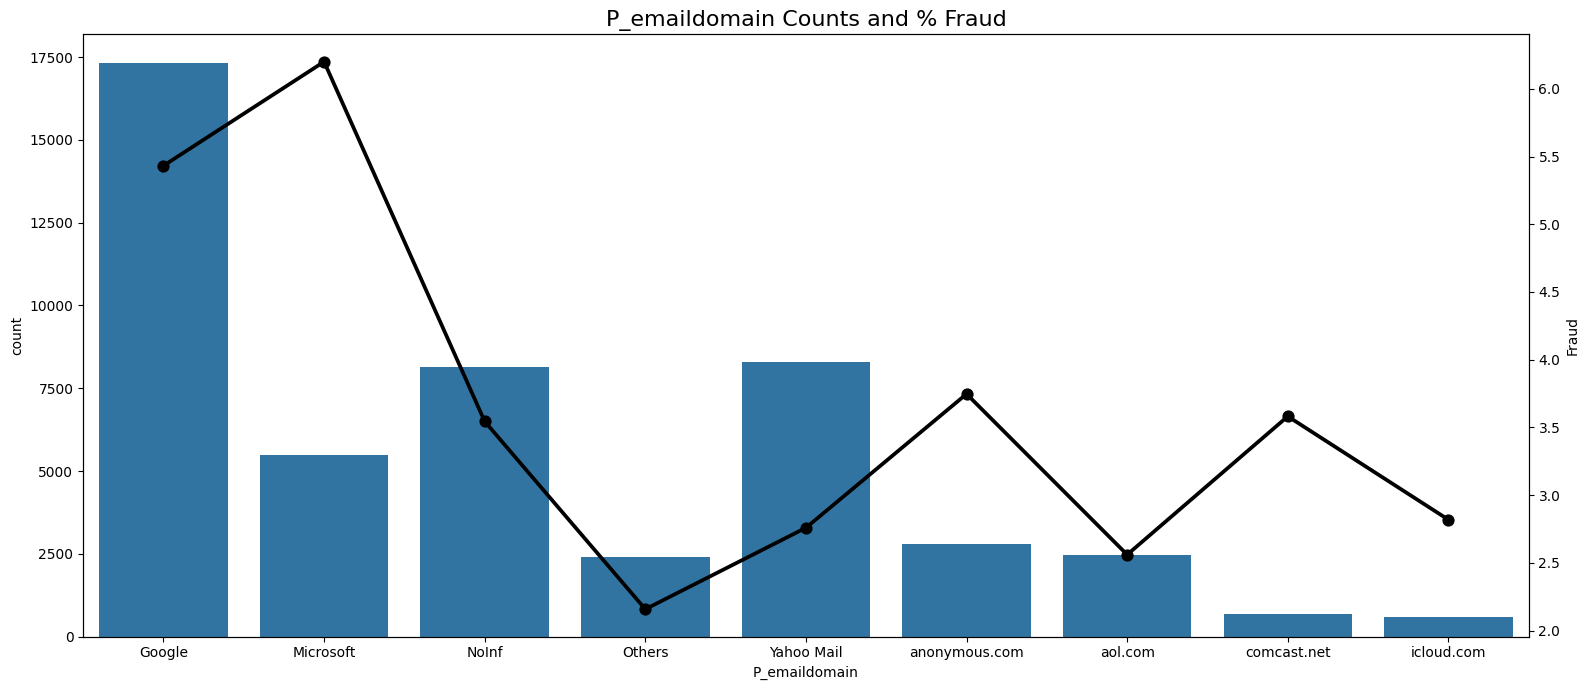

In [ ]:
ploting_cnt_amt(df, 'P_emaildomain')

Tỷ lệ gian lận (%) có sự biến động, với Google và Microsoft có thể ghi nhận tỷ lệ gian lận cao hơn so với các miền khác.
-  Nhóm Google có số lượng giao dịch lớn với khoảng 17,500 giao dịch, tiếp theo là Yahoo Mail và NoInf
- Các nhóm anonymous, comcast mặc dù có số lượng giao dịch ít nhưng tỷ lệ gian lận ở mức 3.5%
- Sự nổi bật của Google trong số lượng giao dịch có thể chỉ ra rằng đây là nền tảng email phổ biến nhất, khiến nó dễ trở thành mục tiêu của các cuộc tấn công gian lận.

In [ ]:
# Select columns starting with 'C' to analyze
columns_C = [col for col in df.columns if col.startswith('C')]

# Check the frequency distribution for each column
column_stats = {}

for col in columns_C:
    value_counts = df[col].value_counts()
    total_records = len(df[col])
    threshold_1_percent = (value_counts / total_records <= 0.01).sum()  # Number of rare values at 1% threshold
    threshold_5_percent = (value_counts / total_records <= 0.05).sum()  # Number of rare values at 5% threshold
    column_stats[col] = {
        "Unique Values": len(value_counts),
        "1% Threshold Rare Values": threshold_1_percent,
        "5% Threshold Rare Values": threshold_5_percent,
    }

# Convert the stats to a DataFrame for analysis
stats_df = pd.DataFrame.from_dict(column_stats, orient='index')
stats_df.reset_index(inplace=True)
stats_df.rename(columns={'index': 'Column'}, inplace=True)

print(stats_df)

<ipython-input-102-42f3806cd9c2>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Others' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col].isin(rare_values), col] = "Others"


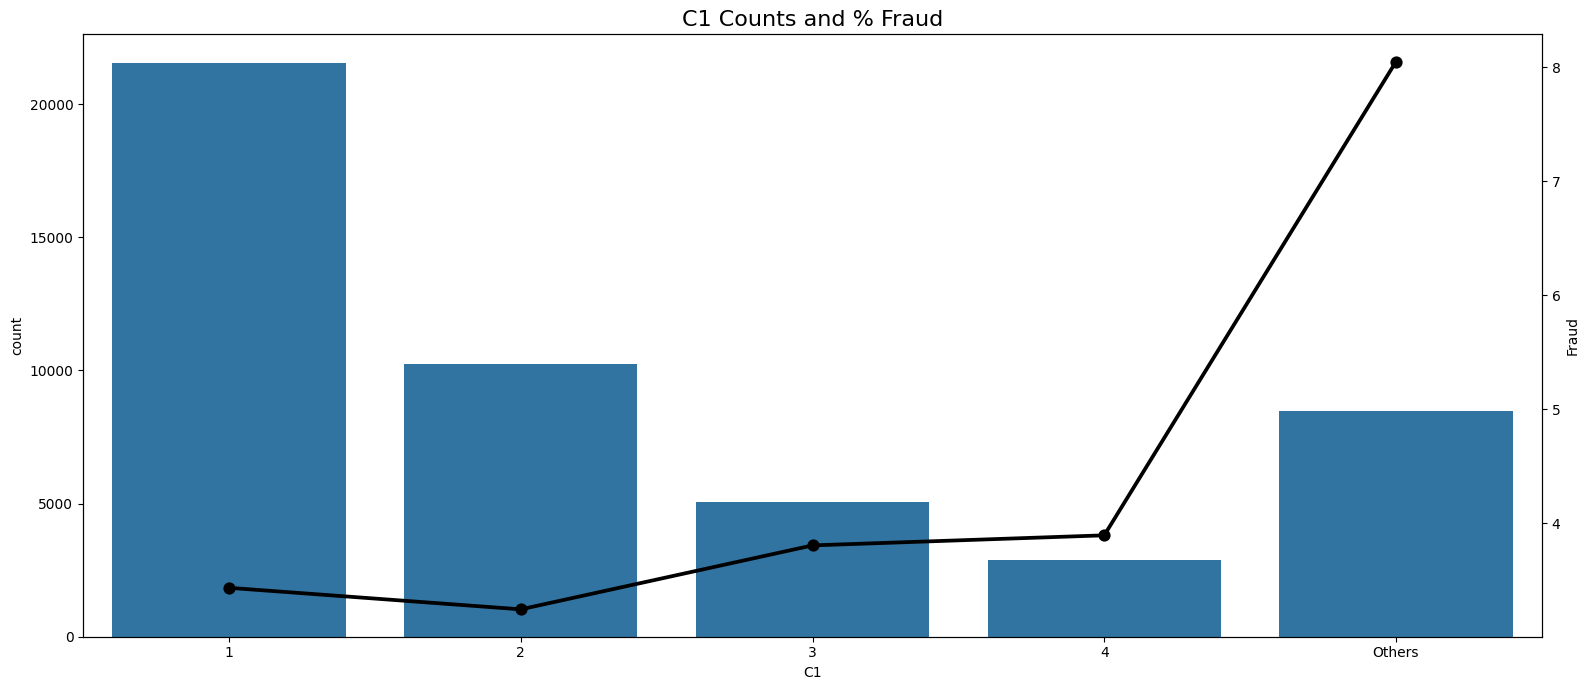

<ipython-input-102-42f3806cd9c2>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Others' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col].isin(rare_values), col] = "Others"


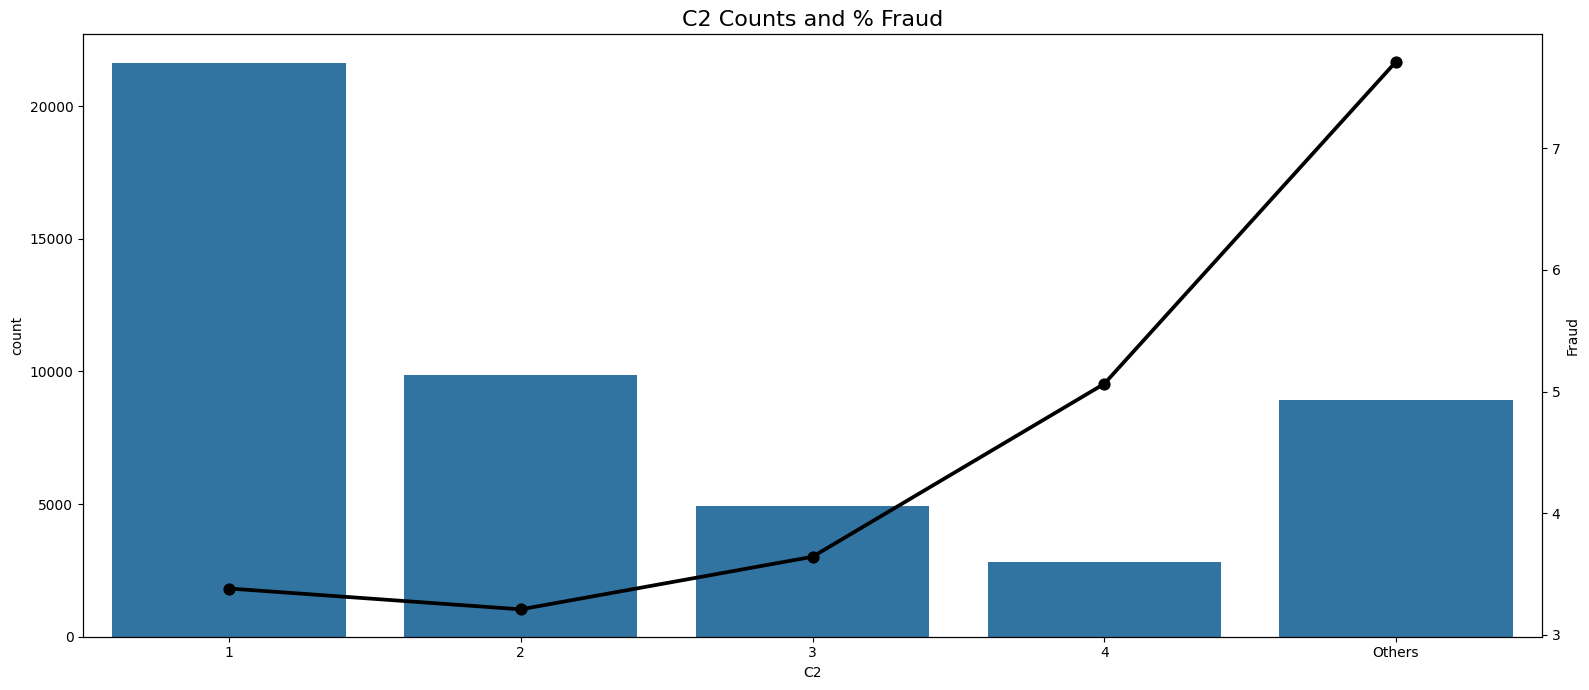

<ipython-input-102-42f3806cd9c2>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Others' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col].isin(rare_values), col] = "Others"


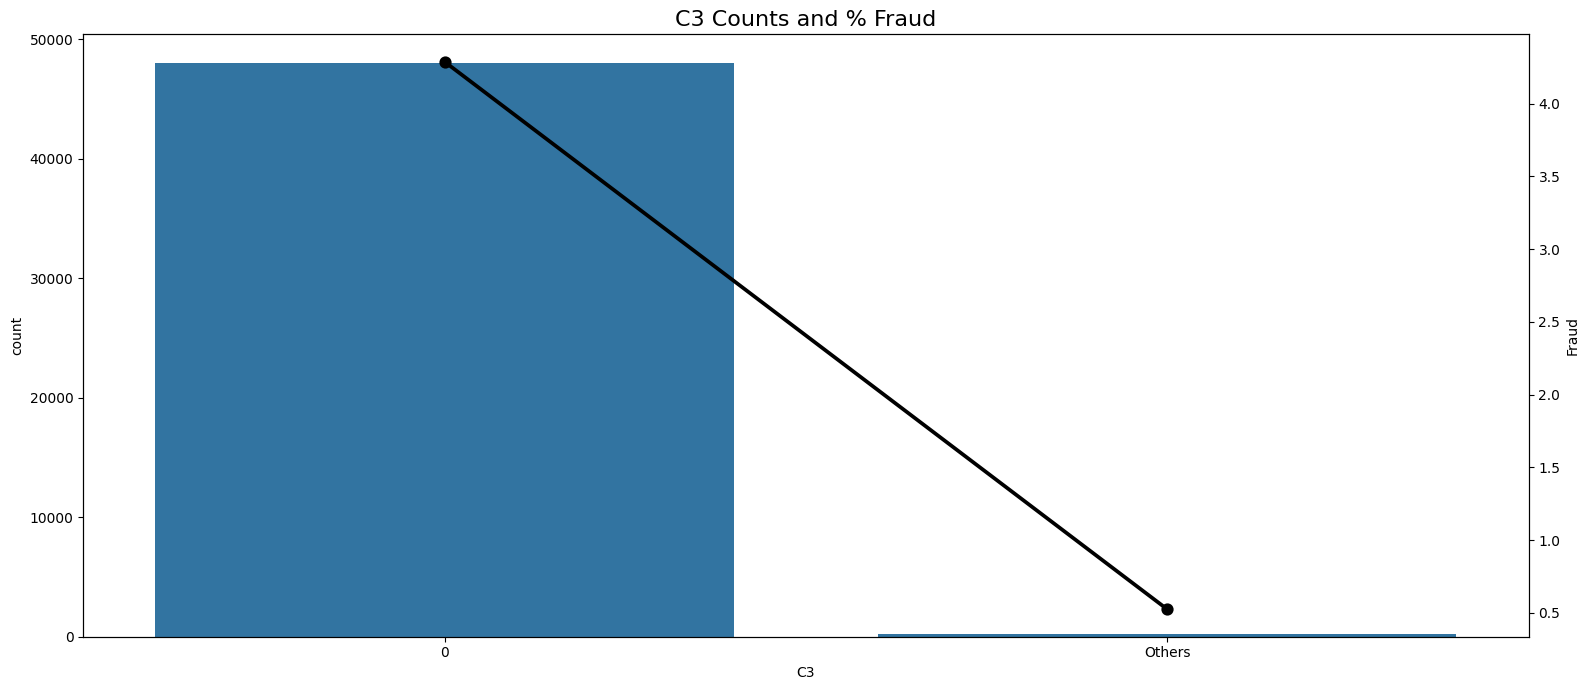

<ipython-input-102-42f3806cd9c2>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Others' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col].isin(rare_values), col] = "Others"


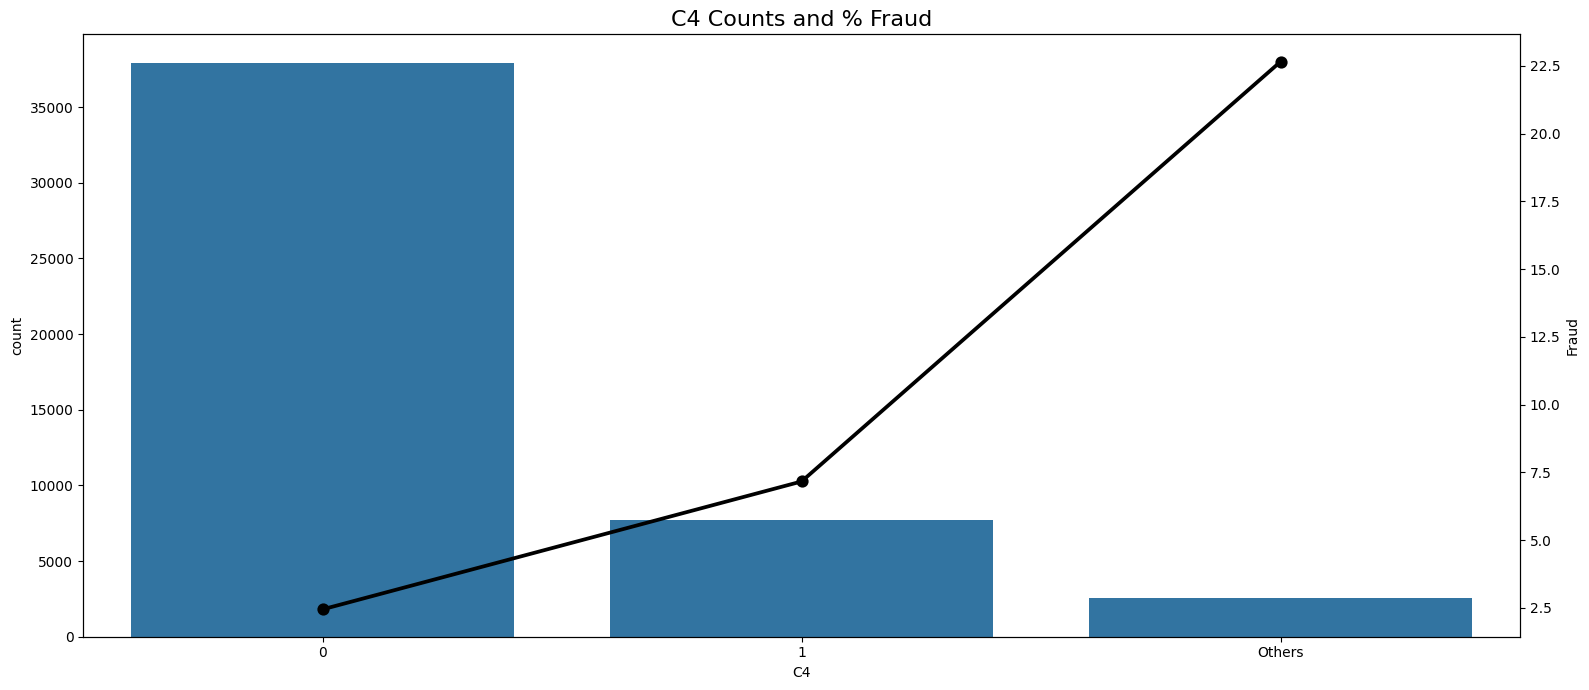

<ipython-input-102-42f3806cd9c2>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Others' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col].isin(rare_values), col] = "Others"


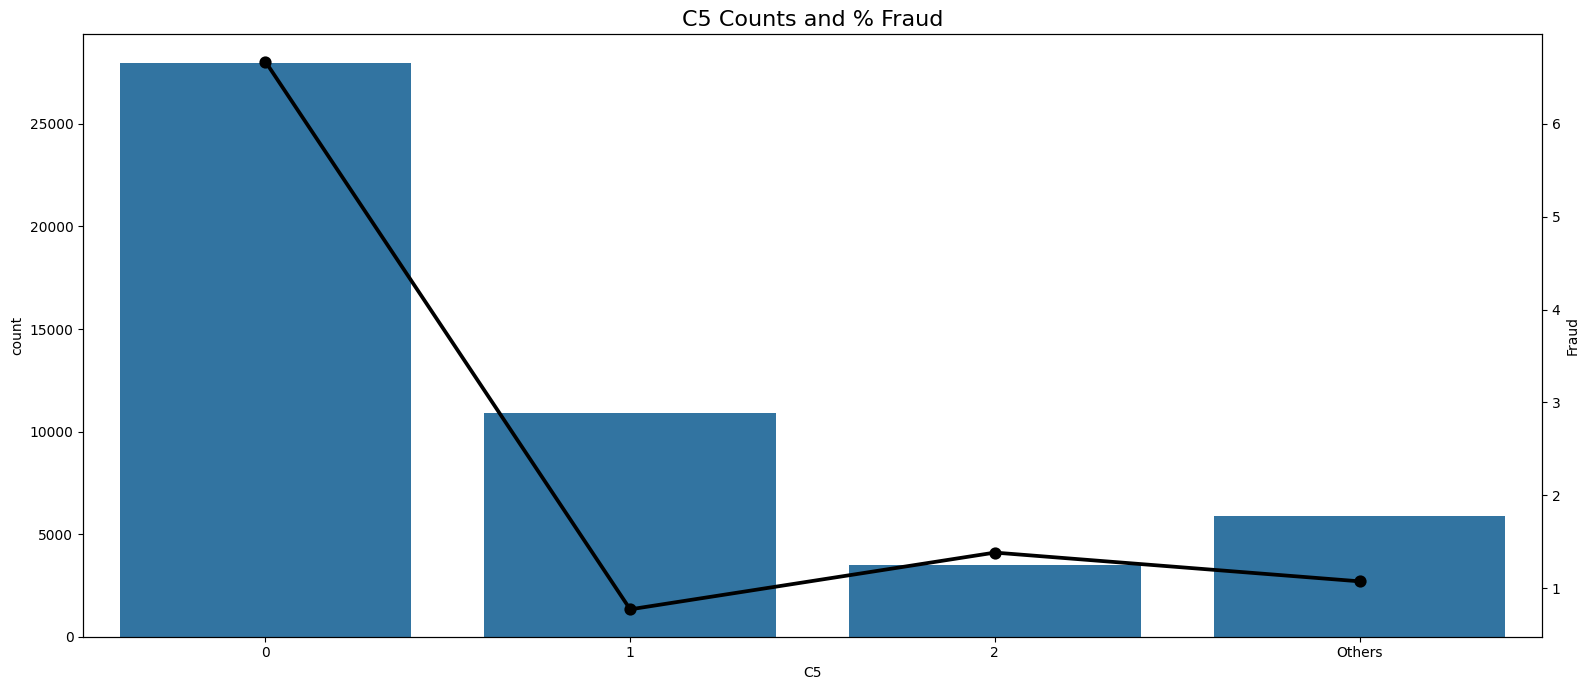

<ipython-input-102-42f3806cd9c2>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Others' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col].isin(rare_values), col] = "Others"


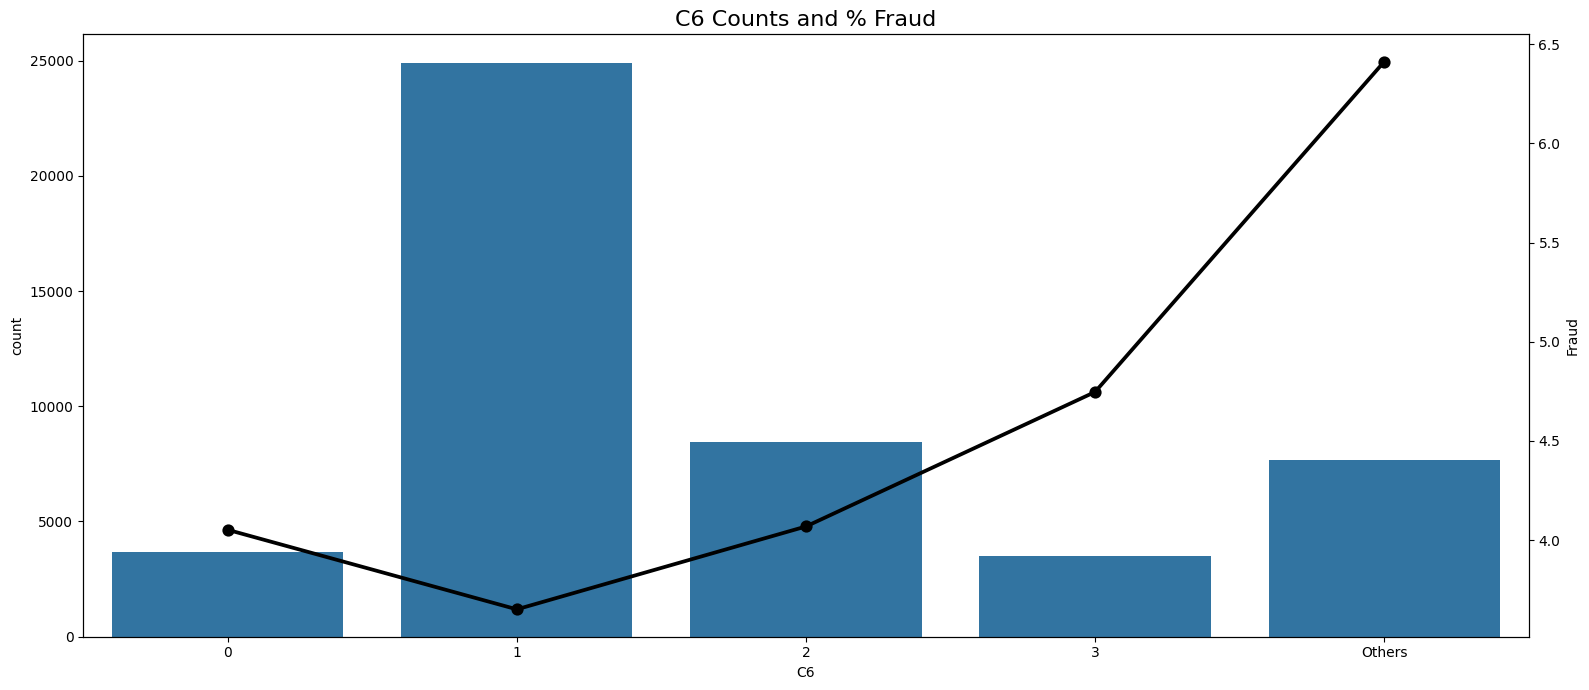

<ipython-input-102-42f3806cd9c2>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Others' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col].isin(rare_values), col] = "Others"


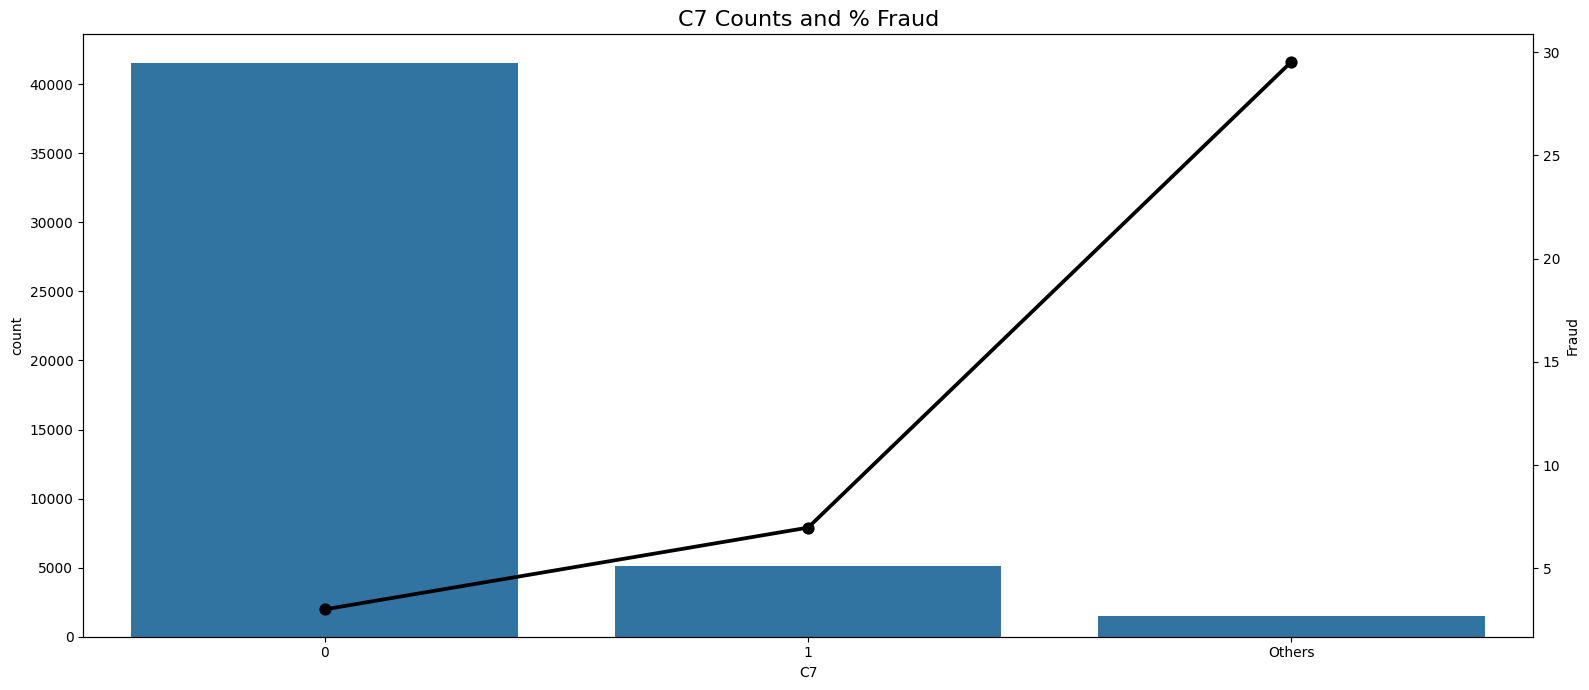

<ipython-input-102-42f3806cd9c2>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Others' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col].isin(rare_values), col] = "Others"


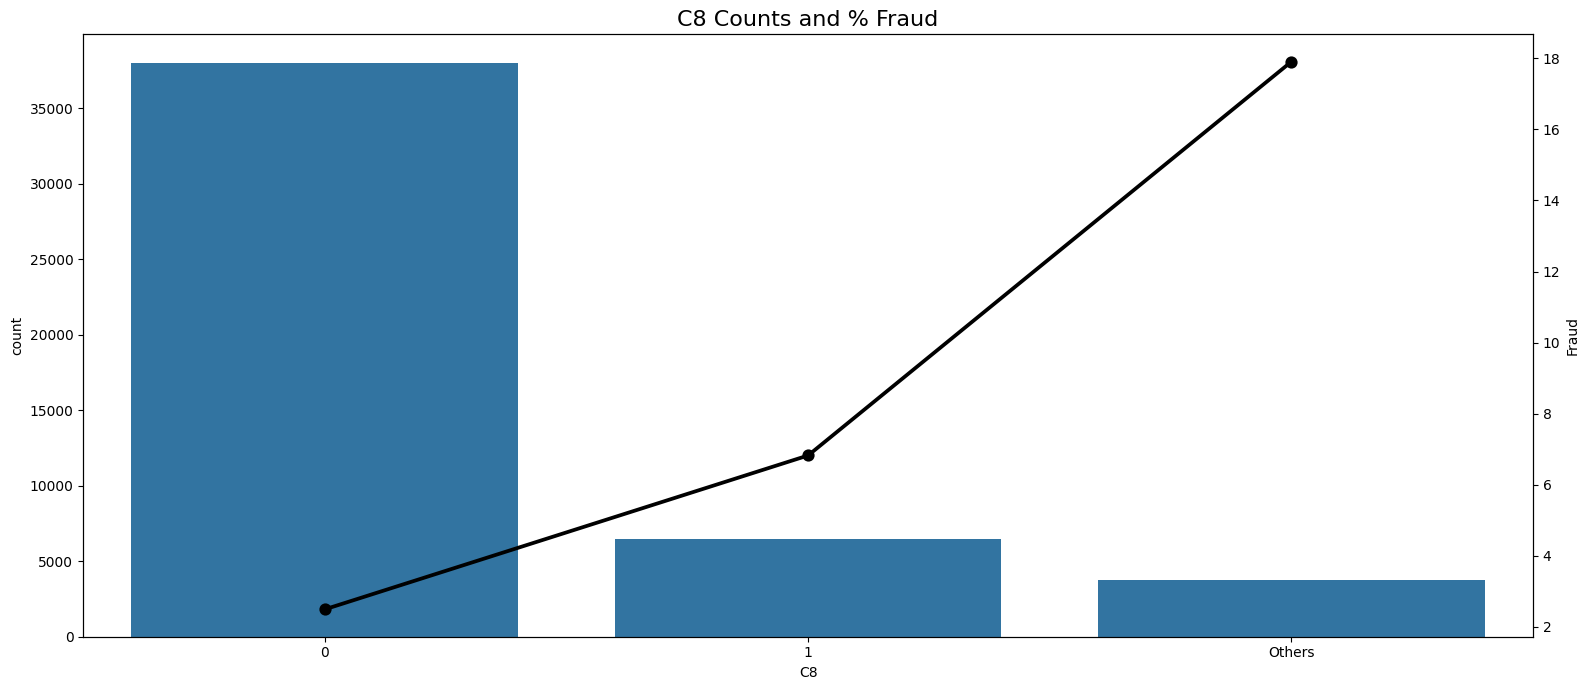

<ipython-input-102-42f3806cd9c2>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Others' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col].isin(rare_values), col] = "Others"


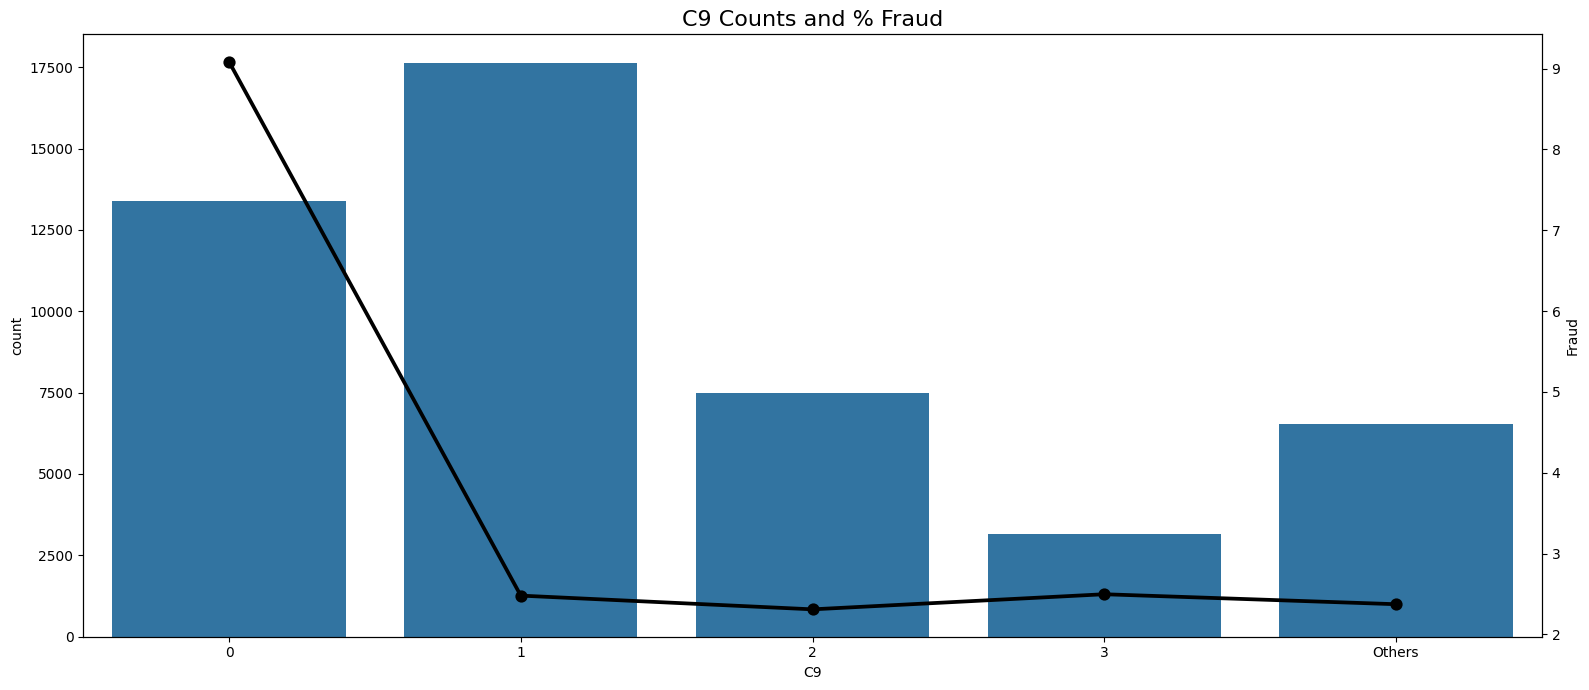

<ipython-input-102-42f3806cd9c2>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Others' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col].isin(rare_values), col] = "Others"


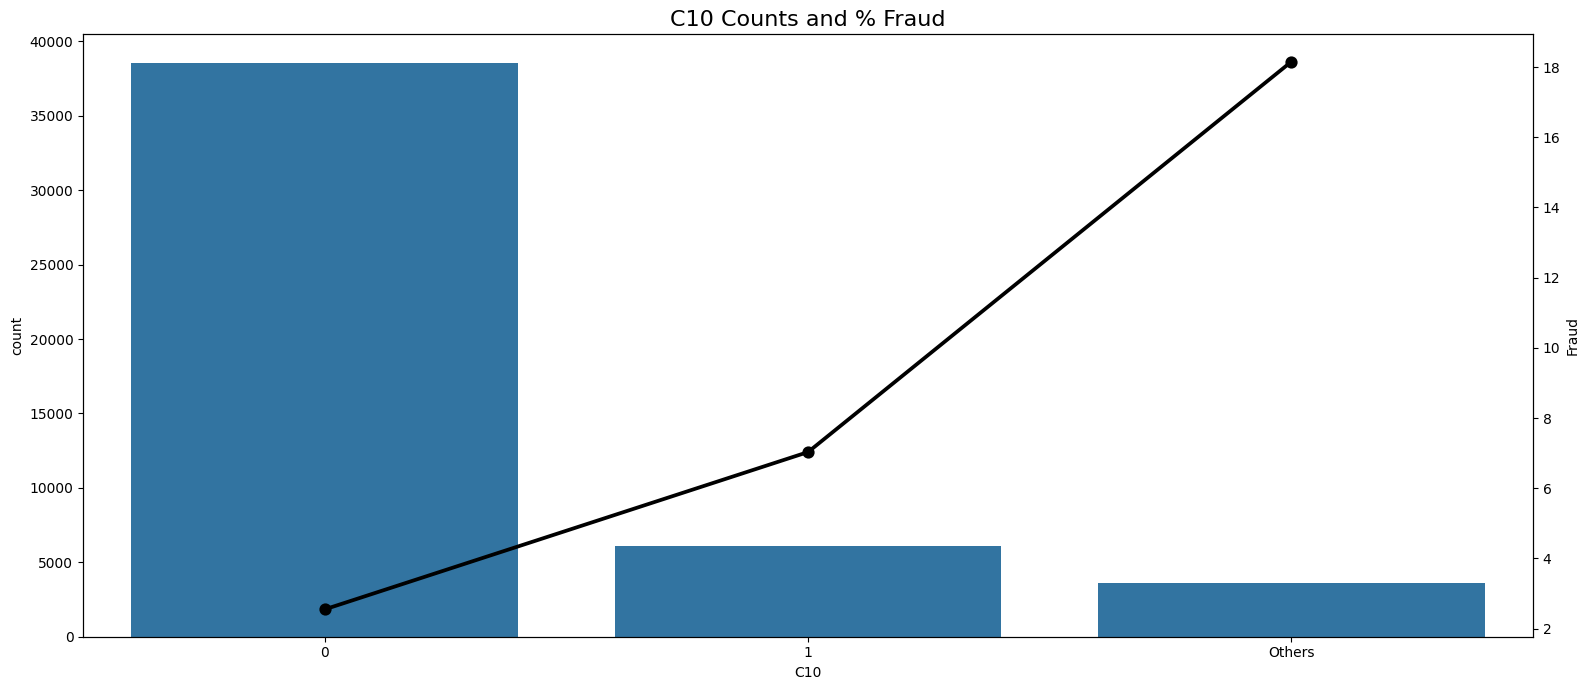

<ipython-input-102-42f3806cd9c2>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Others' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col].isin(rare_values), col] = "Others"


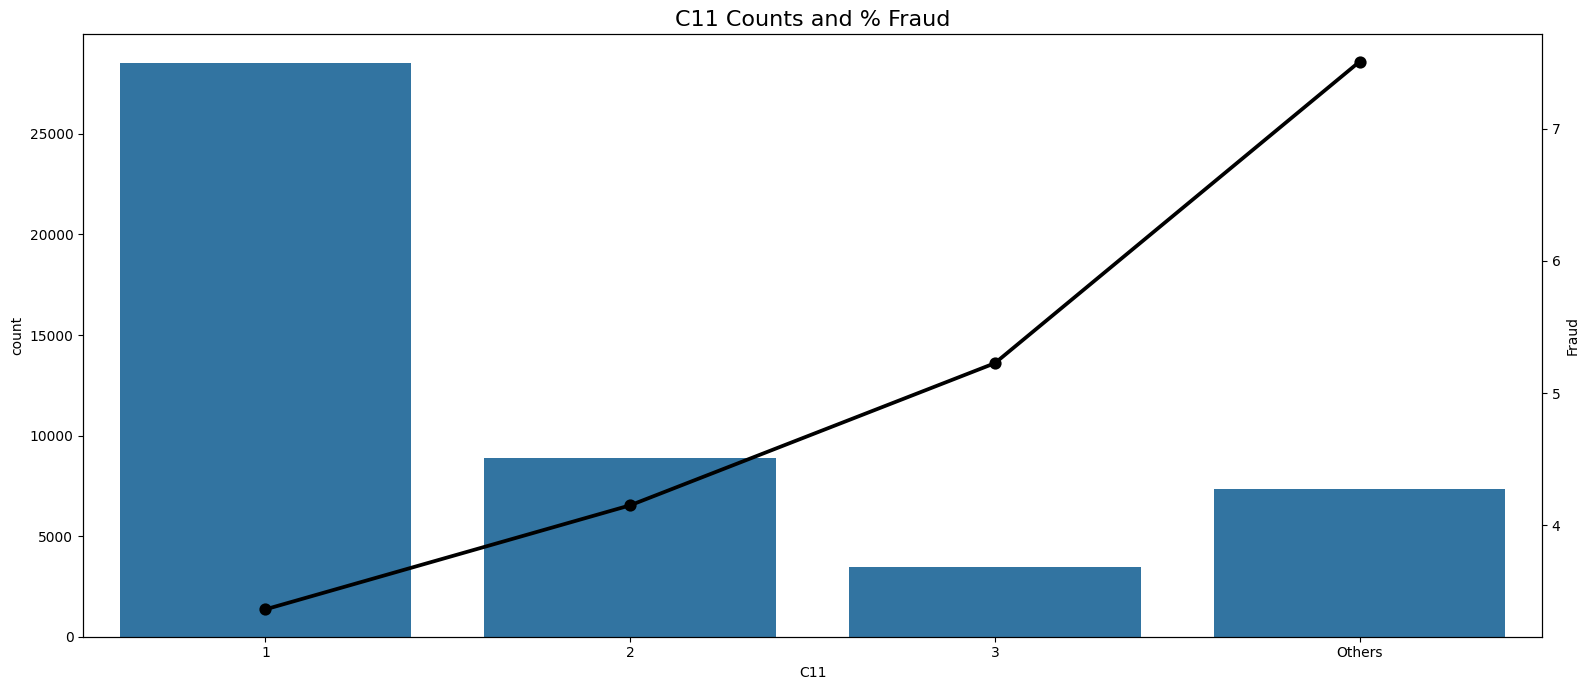

<ipython-input-102-42f3806cd9c2>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Others' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col].isin(rare_values), col] = "Others"


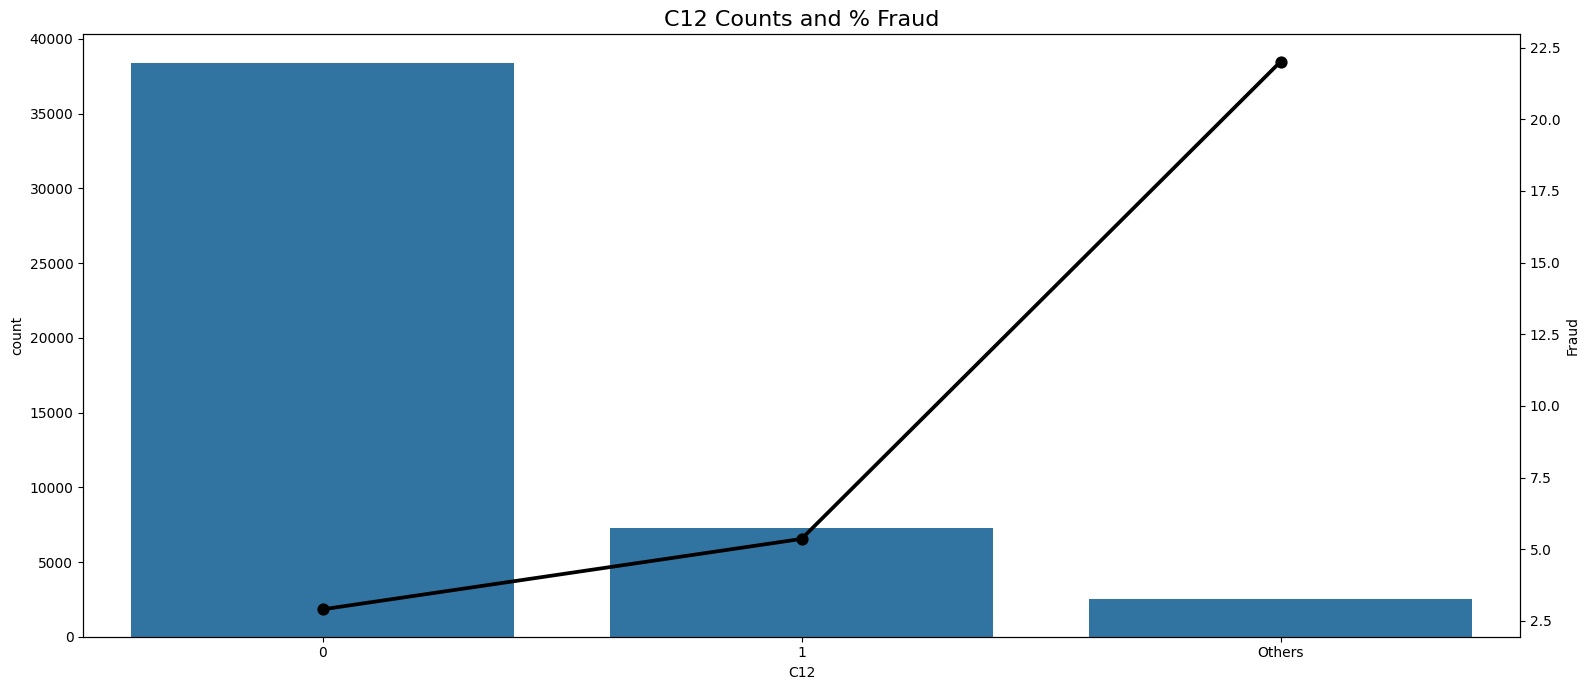

<ipython-input-102-42f3806cd9c2>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Others' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col].isin(rare_values), col] = "Others"


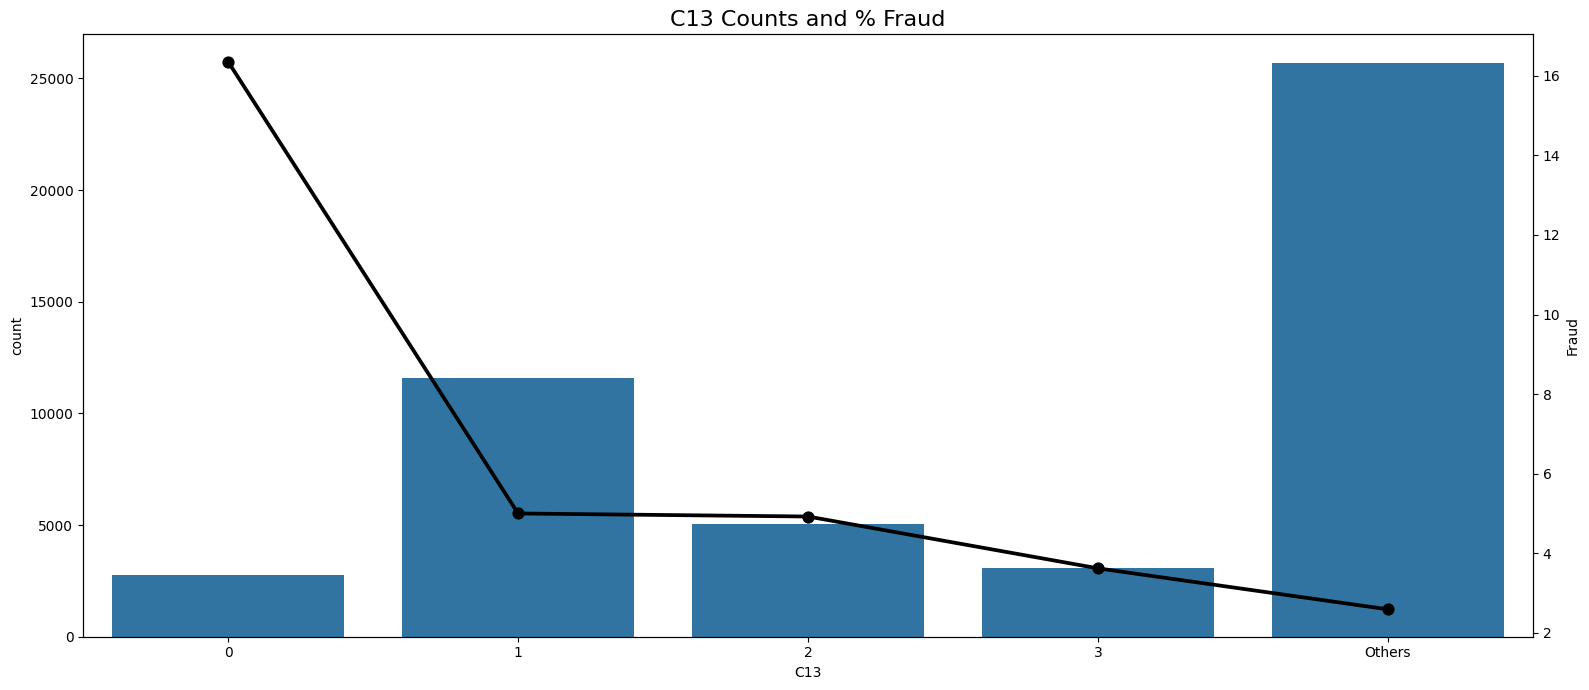

<ipython-input-102-42f3806cd9c2>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Others' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col].isin(rare_values), col] = "Others"


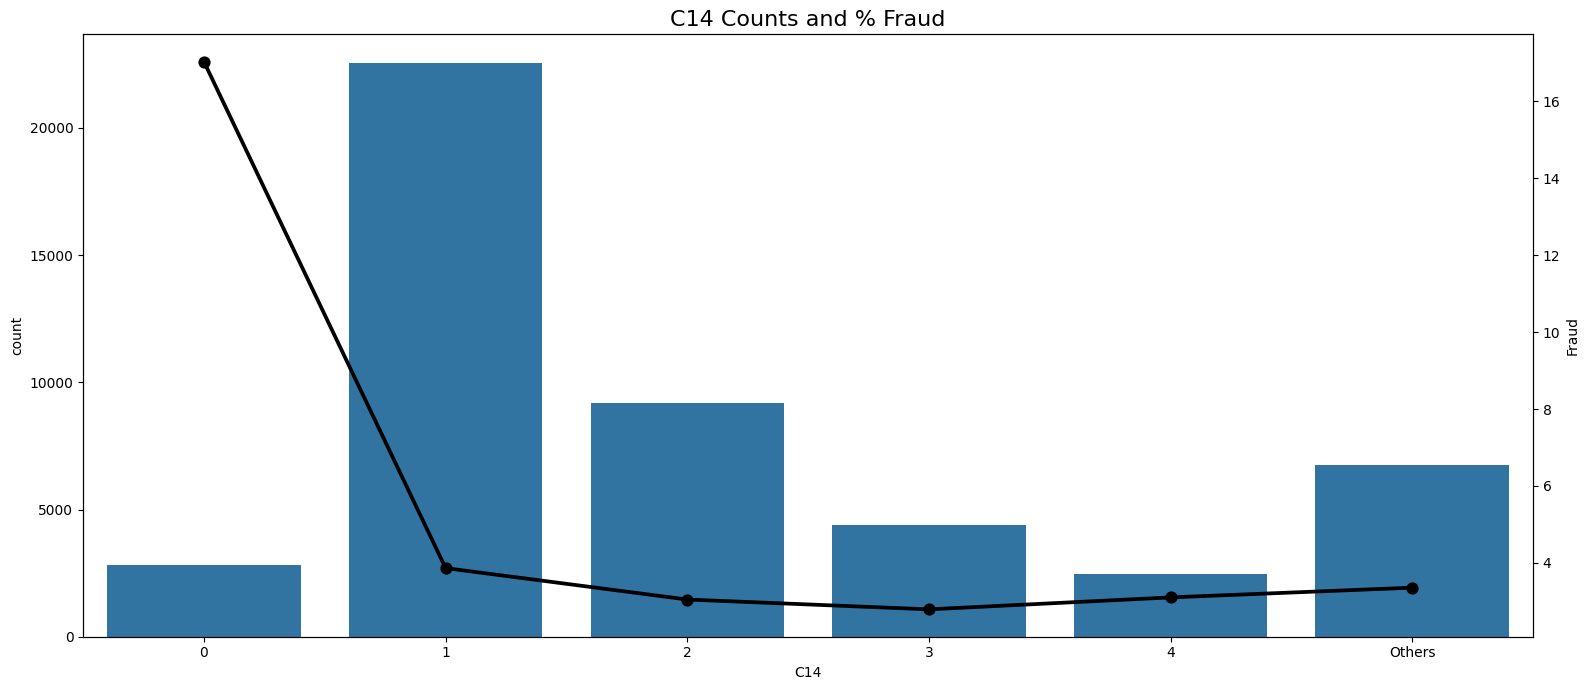

In [ ]:
columns = [f'C{i}' for i in range(1, 15)]  # Danh sách các cột từ C1 đến C14

threshold_percent = 0.05

for col in columns:
    total_records = len(df[col])
    rare_values = df[col].value_counts()[df[col].value_counts() / total_records <= threshold_percent].index
    df.loc[df[col].isin(rare_values), col] = "Others"

    # Vẽ biểu đồ
    ploting_cnt_amt(df, col)

## Thêm thuộc tính (Feature Engineering)

In [ ]:
df['TransactionAmt_to_mean_card4'] = df['TransactionAmt'] / df.groupby(['card4'])['TransactionAmt'].transform('mean')
df['TransactionAmt_to_mean_card6'] = df['TransactionAmt'] / df.groupby(['card6'])['TransactionAmt'].transform('mean')
df['TransactionAmt_to_std_card4'] = df['TransactionAmt'] / df.groupby(['card4'])['TransactionAmt'].transform('std')
df['TransactionAmt_to_std_card6'] = df['TransactionAmt'] / df.groupby(['card6'])['TransactionAmt'].transform('std')

## Encode thuộc tính phân loại

In [ ]:
# Xác định các cột phân loại
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Áp dụng LabelEncoder cho từng cột phân loại
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Chuyển sang chuỗi nếu cần
    label_encoders[col] = le  # Lưu LabelEncoder cho từng cột nếu cần tra cứu sau
df

,card4,card6,P_emaildomain,TransactionAmt,C1,C2,C3,C4,C5,C6,...,C10,C11,C12,C13,C14,isFraud,TransactionAmt_to_mean_card4,TransactionAmt_to_mean_card6,TransactionAmt_to_std_card4,TransactionAmt_to_std_card6
0,3,1,0,62.950,4,4,0,0,3,4,...,0,3,0,4,5,0,0.447518,0.521218,0.255409,0.311880
1,3,1,2,35.950,0,0,0,0,1,0,...,0,0,0,3,1,0,0.255572,0.297661,0.145861,0.178111
2,3,1,4,117.000,0,0,0,0,0,2,...,0,0,0,4,1,1,0.831765,0.968745,0.474708,0.579666
3,3,1,1,54.500,0,0,0,0,0,1,...,0,0,0,0,0,0,0.387446,0.451253,0.221125,0.270015
4,3,1,0,255.000,0,2,0,0,0,4,...,0,2,1,4,1,0,1.812821,2.111367,1.034619,1.263374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59047,3,1,3,30.950,4,3,0,0,2,3,...,0,1,0,4,5,0,0.220027,0.256262,0.125574,0.153339
59050,2,0,4,50.000,0,0,0,0,0,1,...,0,0,0,1,1,0,0.361383,0.241582,0.143362,0.110619
59051,2,1,8,97.950,1,1,0,0,1,2,...,0,1,0,4,2,0,0.707950,0.811013,0.280846,0.485284
59052,3,1,0,16.723,0,1,0,1,0,1,...,1,0,1,1,1,1,0.118885,0.138464,0.067851,0.082853


## Kiểm tra mối tương quan của các thuộc tính

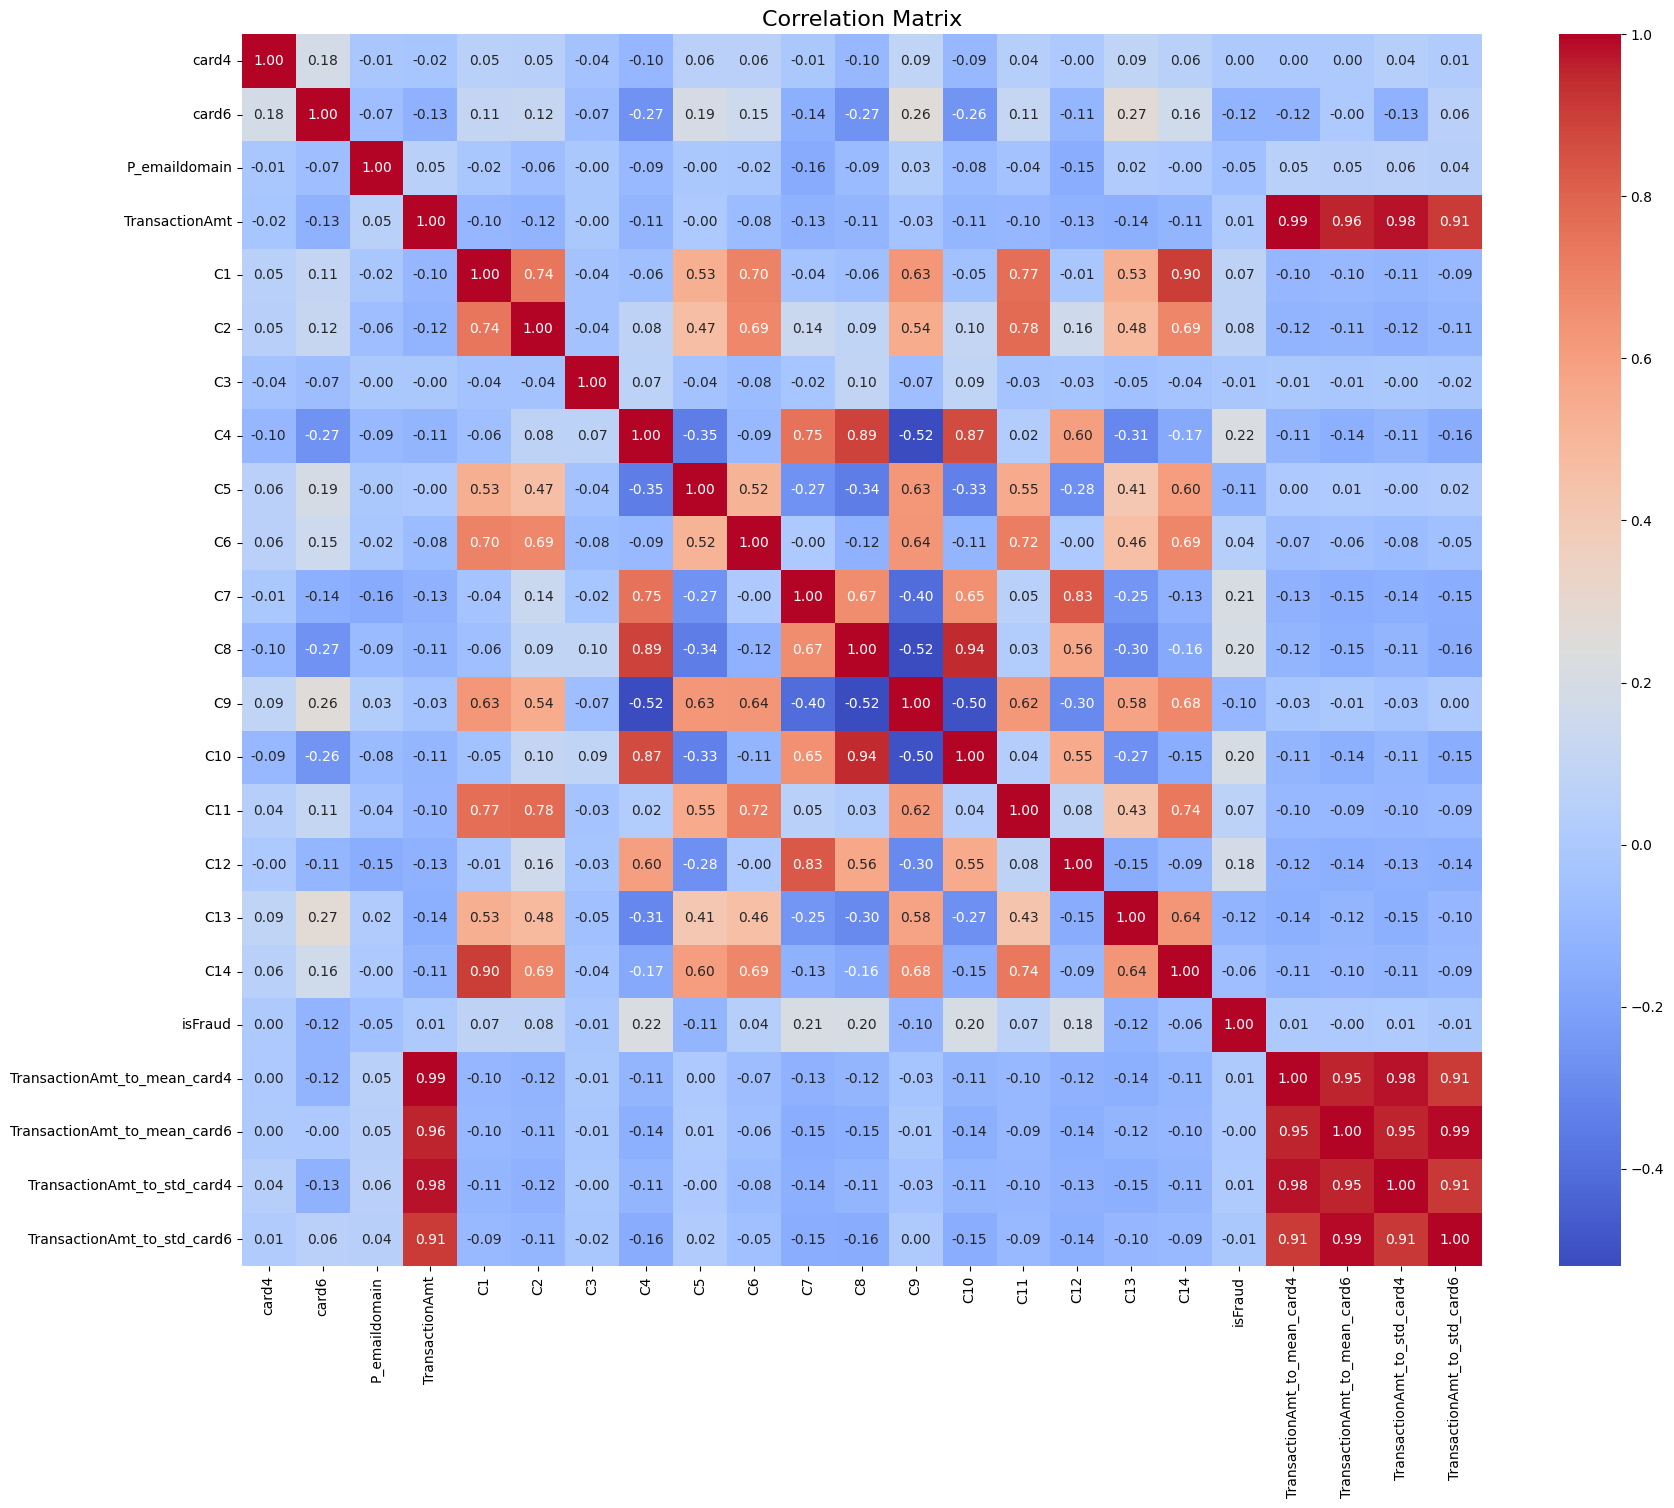

In [ ]:
# Tính toán ma trận tương quan
correlation_matrix = df.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

# Prepare data for training

In [ ]:
X = df.drop(columns=['isFraud'])  # Dữ liệu đặc trưng
y = df['isFraud']  # Nhãn mục tiêu

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên dữ liệu
rf.fit(X, y)

# Lấy độ quan trọng của các biến (feature importance)
feature_importances = rf.feature_importances_

# Tạo DataFrame chứa tên biến và độ quan trọng của chúng
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sắp xếp các biến theo độ quan trọng giảm dần
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# In ra các biến có độ quan trọng cao nhất
print(feature_df.head(10))

                         Feature  Importance
18  TransactionAmt_to_mean_card4    0.086909
20   TransactionAmt_to_std_card4    0.085701
2                  P_emaildomain    0.083384
4                             C1    0.081926
21   TransactionAmt_to_std_card6    0.080418
3                 TransactionAmt    0.078528
19  TransactionAmt_to_mean_card6    0.078266
16                           C13    0.056586
17                           C14    0.052799
9                             C6    0.050419


In [ ]:
# Các biến quan trọng được chọn
important_features = ['C1', 'C13', 'TransactionAmt_to_mean_card4', 'TransactionAmt_to_std_card4',
                      'TransactionAmt_to_std_card6', 'P_emaildomain', 'TransactionAmt_to_mean_card6', 'TransactionAmt']

# Chọn các cột quan trọng trong DataFrame
df_selected = df[important_features]

In [ ]:
# Chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(df_selected, df['isFraud'], test_size=0.2, random_state=42)

In [ ]:
# Sử dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(random_state=42)

# Áp dụng SMOTE chỉ cho X_train và y_train (dữ liệu huấn luyện)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)
# Kiểm tra sự thay đổi tỷ lệ sau khi áp dụng SMOTE
print(f"Trước SMOTE: {Counter(y_train)}")
print(f"Sau SMOTE: {Counter(y_train_resampled)}")

Trước SMOTE: Counter({0: 36903, 1: 1658})
Sau SMOTE: Counter({0: 36903, 1: 36903})


# Building Model



In [ ]:
# 1. Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)
y_pred_logreg = logreg.predict(X_test_resampled)

# 2. Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test_resampled)

# 3. Support Vector Machine (SVM)
svm = SVC(random_state=42)
svm.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm.predict(X_test_resampled)

# Rating them
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 4. XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb.predict(X_test_resampled)

# 5. Neural Network (MLP)
nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
nn.fit(X_train_resampled, y_train_resampled)
y_pred_nn = nn.predict(X_test_resampled)

# Rating them
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))